# Wine Reviews

### Abstract
This report utilized the “Wine Reviews” dataset from Kaggle consisting of 150 thousand different wine reviews.  The data will be used to answer the following questions: Is there any correlation between the rating of wine and the price? What wines would be considered excellent value (low cost / high points)?, Could you predict if a wine is a red or a white based on its description?  A combination of statistical methods as well as machine learning (regression and clustering) techniques were used.  It was determined that the pricing of wine is not correlated to its rating.  That there are a number of excellent value wines, with the top coming out of Washington State. Finally, that the description from a sommelier could be used to determine if a wine was either white or red.

### Reseach Questions
1. Is there any correlation between the rating of wine and the price?
2. What wines would be considered excellent value (low cost / high points)?
3. Could you predict if a wine is a red or a white based on its description?


### Dataset
* The Wine Reviews Dataset on Kaggle
* URL: https://www.kaggle.com/zynicide/wine-reviews
* File: winemag-data_first150k.csv
* Size: 150,930 pre-cleaned records
* Content: this dataset contains various information of wines from around the world with data such as: country, description, designation, points (Wine Spectator), price, province, region, varietal (type of grape), and winery.

In [2]:
import numpy as np
import pandas as pd
import warnings

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

from math import sqrt

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

In [3]:
wine = pd.read_csv('../../datasets/wine/winemag-data_first150k.csv', sep=',')
wine.count()

Unnamed: 0     150930
country        150925
description    150930
designation    105195
points         150930
price          137235
province       150925
region_1       125870
region_2        60953
variety        150930
winery         150930
dtype: int64

In [4]:
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
len_before = len(wine)
len_before

150930

In [6]:
wine = wine.drop(columns=[("Unnamed: 0")])
wine = wine.drop(columns=[("region_2")])
wine.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [7]:
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [8]:
wine.corr()

,points,price
points,1.000000,0.459863
price,0.459863,1.000000


In [9]:
wine.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
variety        False
winery         False
dtype: bool

In [10]:
wine = wine.dropna(subset=['points', 'price'])

In [11]:
wine.isnull().any()

country         True
description    False
designation     True
points         False
price          False
province        True
region_1        True
variety        False
winery         False
dtype: bool

In [12]:
wine.shape

(137235, 9)

In [13]:
len_after = len(wine)
len_after

137235

In [14]:
print(len_before - len_after)

13695


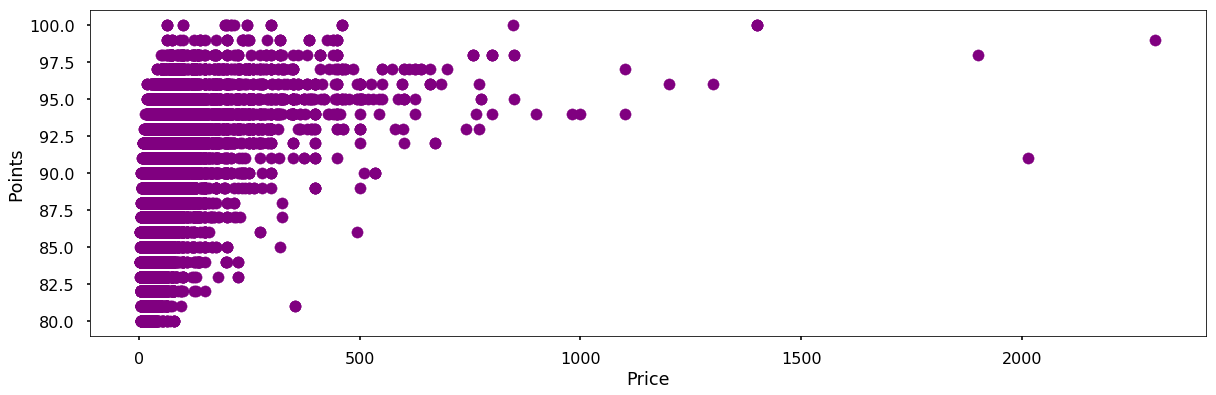

In [15]:
plt.figure(figsize=(20,6))
plt.style.use('seaborn-poster')

x = wine['price']
y = wine['points']

plt.scatter(x, y, color='purple')
plt.xlabel("Price")
plt.ylabel("Points")

# If plotting the entire dataset with the expensive wine, use Log scale
# plt.xscale('log')

plt.show()

In [16]:
filter = wine['price'] <= 100
wine = wine[filter]

In [17]:
wine.describe()

,points,price
count,133770.000000,133770.000000
mean,87.655012,29.280609
std,3.120282,18.757313
min,80.000000,4.000000
25%,85.000000,15.000000
50%,87.000000,24.000000
75%,90.000000,38.000000
max,100.000000,100.000000


In [18]:
wine.corr()

,points,price
points,1.000000,0.551974
price,0.551974,1.000000


## Question 1: Is there any correlation between the rating of a wine and the price?

Using a **scatter plot** let's visualizize the distribution of wine prices vs. ratings.

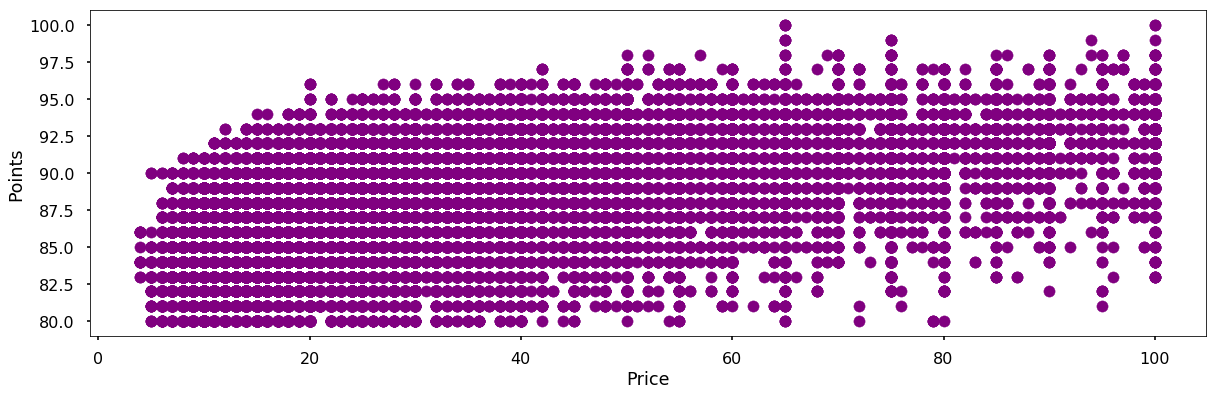

In [19]:
plt.figure(figsize=(20,6))
plt.style.use('seaborn-poster')

x = wine['price']
y = wine['points']

plt.scatter(x, y, color='purple')
plt.xlabel("Price")
plt.ylabel("Points")

# If plotting the entire dataset with the expensive wine, use Log scale
# plt.xscale('log')

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2744eb38>]],
      dtype=object)

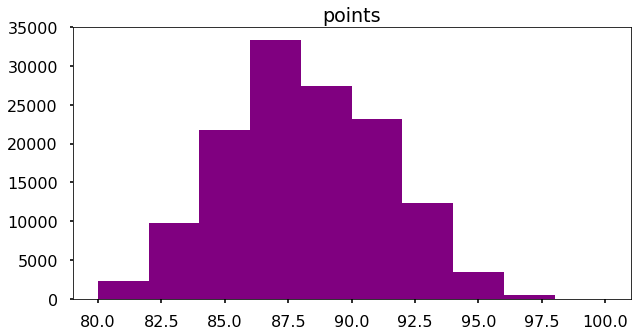

In [20]:
wine.hist(column='points', figsize=(10,5), grid=False, color='purple')

### Regression Analysis

Using a regression, try to predict the price of the wine based on points

In [21]:
features = ['points']
target = ['price']
X = wine[features]
y = wine[target]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [23]:
y_test.describe()

,price
count,44145.000000
mean,29.161355
std,18.726518
min,4.000000
25%,15.000000
50%,24.000000
75%,38.000000
max,100.000000


In [24]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [25]:
y_prediction = regressor.predict(X_test)
y_prediction

array([40.90081005, 24.22203791, 19.16607143, ..., 19.13811522,
       31.32805606, 24.22203791])

In [26]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [27]:
print(RMSE)

15.113338693146959


In [28]:
# tree.export_graphviz(regressor, out_file='tree.dot') 

## Question 3: Could you predict if a wine is a red or a white based on its description?

Using **k-Means** we're going to vectorize all of the descriptions and then cluster all of the wines into two groups; resulting in Reds and Whites.  This will allow us to classify any future wines based on the descriptions used and the flavor characteristics.

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
V = vectorizer.fit_transform(wine['description'])

In [30]:
# Run k-Means 
model = KMeans(n_clusters=2, init='k-means++', max_iter=25, n_init=1)
model.fit(V)
clust_labels = model.predict(V)
cent = model.cluster_centers_

kmeans = pd.DataFrame(clust_labels)
wine.insert((wine.shape[1]),'kmeans',kmeans)

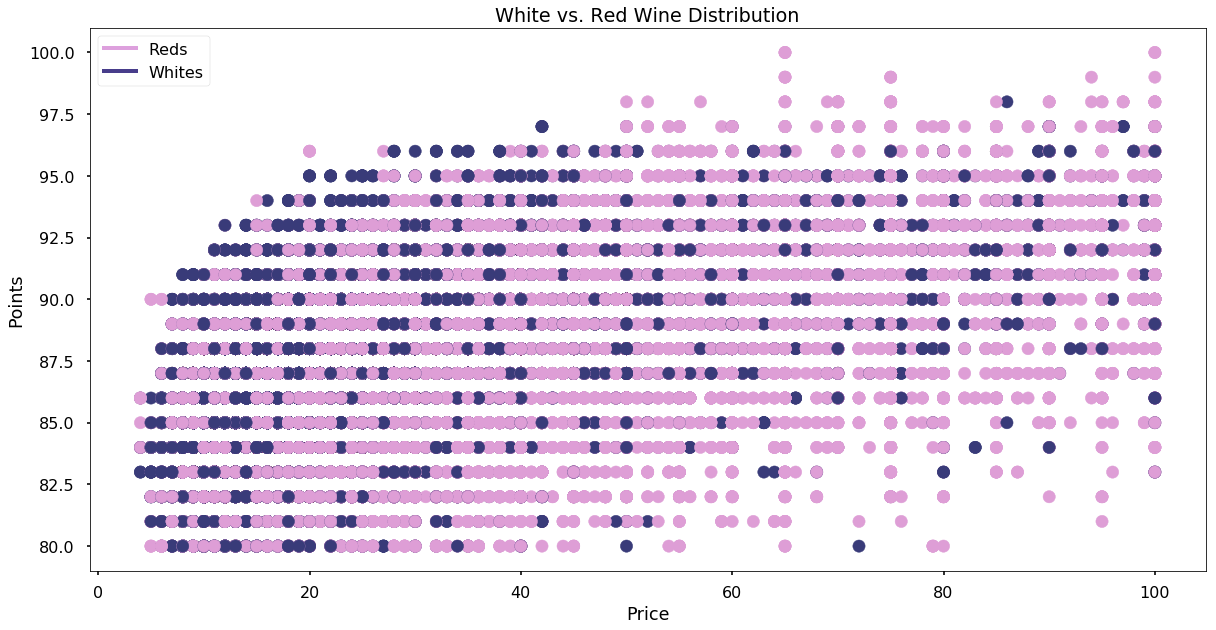

In [31]:
#Plot the clusters obtained using k means
plt.style.use('seaborn-poster')

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

custom_lines = [Line2D([1], [1], color='plum', lw=4),
                Line2D([1], [1], color='darkslateblue', lw=4)]

x_wine = wine['price']
y_wine = wine['points']

scatter = ax.scatter(x_wine , y_wine, c=kmeans[0], s=150, alpha=1, cmap='tab20b', marker='o', edgecolors=None)
ax.set_title('White vs. Red Wine Distribution')
ax.set_xlabel('Price')
ax.set_ylabel('Points')

ax.legend(custom_lines, ['Reds', 'Whites'])

#plt.colorbar(scatter)
plt.show()

In [32]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(2):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 wine
 flavors
 acidity
 apple
 citrus
 fruit
 crisp
 fresh
 white
 finish
 peach
 aromas
 palate
 pear
 green
Cluster 1:
 wine
 flavors
 cherry
 tannins
 fruit
 black
 red
 berry
 finish
 aromas
 blackberry
 drink
 spice
 ripe
 dry


### Use the Model to Predict Red vs. White Wine

Based on the varietal alone, you’re not able to tell if a wine is a red or a white wine (White Zinfandel vs. a Red Zinfandel).  Certain grapes are used to produce both.  The following excerpt from Wine Folly:

```Did you know that white wine can be made with red or white grapes? The major difference between making red wine and white wine is that the juice is fermented without the grape’s skins when making white wine.```

Therefore, using the sommeliers descriptions of the wines, we were able to perform a cluster analysis and group the wines into white and reds based on their tasting characteristics


**This is a White Wine**

In [33]:
a_white = wine.iloc[0]['description']
print(a_white)

Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.


In [34]:
white = vectorizer.transform([a_white])
prediction = model.predict(white)
print(prediction)

[0]


**This is a Red Wine**

In [35]:
a_red = wine.iloc[1]['description']
print(a_red)

This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors of toast, cigar box, blackberry, black cherry, coffee and graphite. Tannins are polished to a fine sheen, and frame a finish loaded with dark chocolate and espresso. Drink now through 2032.


In [36]:
red = vectorizer.transform([a_red])
prediction = model.predict(red)
print(prediction)

[1]


## Question 2: What wines would be considered excellent value (low cost / high points)?

Looking through the dataset to identify wines that would be considered great value.  What can we learn from this filtering?

In [37]:
value_wines = wine

In [38]:
filter = value_wines['points'] >= 95
value_wines = value_wines[filter]
value_wines.shape

(1533, 10)

In [39]:
filter = value_wines['price'] <= 20
value_wines = value_wines[filter]
value_wines.shape

(7, 10)

In [40]:
value_wines.head(10)

,country,description,designation,points,price,province,region_1,variety,winery,kmeans
22079,US,"With residual sugar at about 1.35%, this balan...",NaN,95,20.0,Washington,Columbia Valley (WA),Riesling,Poet's Leap,1.0
51461,US,Spectacular is the word that comes to mind her...,Bacchus Vineyard,95,20.0,Washington,Columbia Valley (WA),Riesling,Januik,1.0
56971,US,"Superb fruit highlights this tight, sculpted S...",NaN,96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo,1.0
85050,US,"Truly stunning, the Lewis Estate Riesling from...",Lewis Estate Vineyard,95,20.0,Washington,Columbia Valley (WA),Riesling,Dunham,0.0
104504,US,"Simply astonishing for its price, this toasty,...",NaN,95,20.0,Washington,Walla Walla Valley (WA),Chardonnay,Rulo,1.0
109231,US,"Superb fruit highlights this tight, sculpted S...",NaN,96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo,1.0
134101,US,"Superb fruit highlights this tight, sculpted S...",NaN,96,20.0,Washington,Columbia Valley (WA),Syrah,Rulo,NaN


In [41]:
value_wines_more = wine

In [42]:
filter = value_wines_more['points'] >= 92
value_wines_more = value_wines_more[filter]
value_wines_more.shape

(16265, 10)

In [43]:
filter = value_wines_more['price'] <= 20
value_wines_more = value_wines_more[filter]
value_wines_more.shape

(565, 10)

In [44]:
value_wines_more.head()

,country,description,designation,points,price,province,region_1,variety,winery,kmeans
322,France,This is one of the classics among Provence ros...,NaN,94,20.0,Provence,Coteaux d'Aix-en-Provence,Rosé,Château Vignelaure,0.0
517,Canada,Coming from vines ranging in age from 9–39 yea...,Cave Spring Vineyard Estate Bottled VQA,92,17.0,Ontario,Beamsville Bench,Riesling,Cave Spring,1.0
529,Hungary,"This wine is straw in color, with delightful n...",NaN,92,16.0,Tokaji,NaN,Furmint,Royal Tokaji,1.0
531,US,Abundant flavors combine with a plush texture ...,Kristen's Cuvee,92,20.0,California,California,Viognier,Rock Wall,1.0
533,France,"This special selection, tight-cropped from 30 ...",NaN,92,18.0,Bordeaux,Blaye Côtes de Bordeaux,Bordeaux-style Red Blend,Château Marsau,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ad86128>]],
      dtype=object)

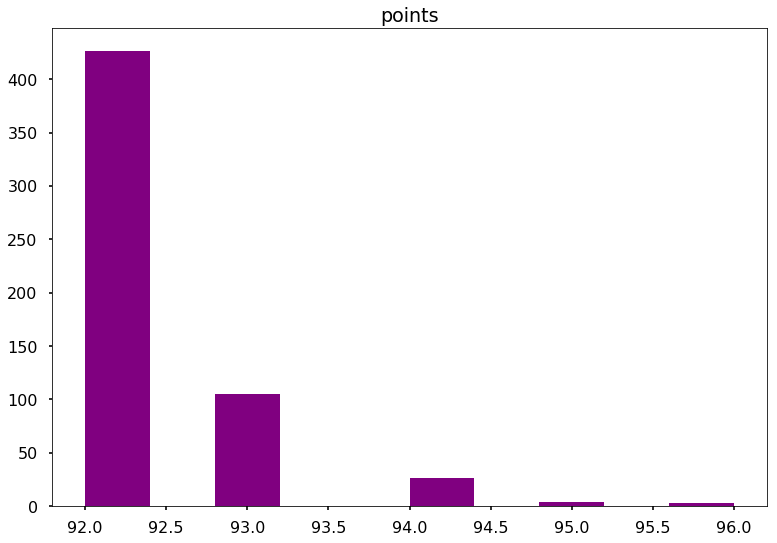

In [45]:
value_wines_more.hist(column='points', grid=False, color='purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ad86908>]],
      dtype=object)

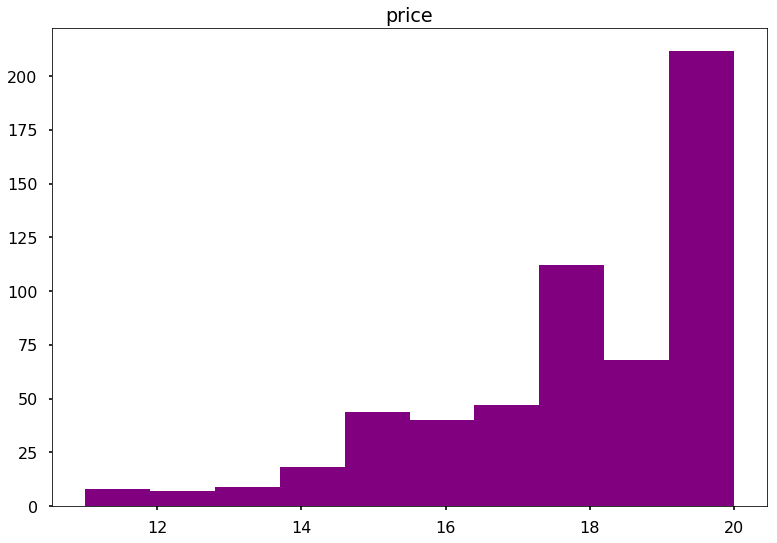

In [46]:
value_wines_more.hist(column='price', grid=False, color='purple')

In [47]:
value_wines_loc = value_wines_more[['country', 'description']].groupby('country',as_index=False).count()
value_wines_loc.sort_values(by='country', ascending=False).head(10)


,country,description
13,US,321
12,Spain,7
11,South Africa,5
10,Portugal,68
9,New Zealand,6
8,Italy,24
7,Hungary,1
6,Germany,4
5,France,69
4,Chile,4


## Bonus: Map the Wines by Region

In [48]:
by_country = wine[['designation','country']].groupby("country",as_index=False).count()
by_country.sort_values(by='designation', ascending=False).head(10)

,country,designation
42,US,39381
21,Italy,12836
14,France,9252
39,Spain,6227
8,Chile,4842
1,Argentina,3823
32,Portugal,3659
2,Australia,3165
3,Austria,2131
16,Germany,2090


In [49]:
#Ref: https://plot.ly/python/choropleth-maps/

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = dict(type = 'choropleth', 
           locations = by_country['country'],
           locationmode = 'country names',
           z = by_country['designation'], 
           text = by_country['country'],
           colorscale = scl,
           autocolorscale = False, 
           colorbar = {'title':'Count'})
layout = dict(title = 'Wines by Country', 
             geo = dict(showframe = False, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
py.iplot(choromap3)

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

